# California Housing Prices
### José Juan Gonzalez

## Importación de librerias y carga del conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("../data/housing.csv")

# Vista inicial
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploración inicial


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Resumen estadístico:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Valores faltantes por columna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


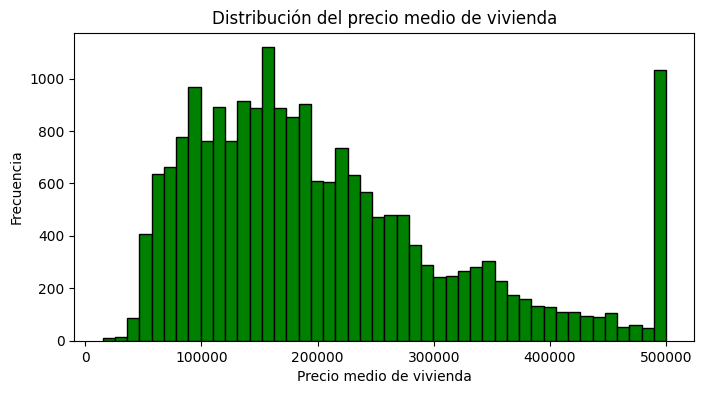

In [2]:
print("\nInformación general:")
df.info()

print("\nResumen estadístico:")
display(df.describe())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
plt.figure(figsize=(8,4))
plt.hist(df["median_house_value"], bins='auto', color='g',edgecolor='black')
plt.xlabel("Precio medio de vivienda")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio medio de vivienda")
plt.show()


## Limpieza de Datos

La única columna con valores faltantes es 'total_bedrooms' (~1% del dataset).

Eliminamos esas filas para evitar introducir sesgo, ya que representan una fracción muy pequeña del total.

In [3]:
filas_previas = df.shape[0]
df = df.dropna(subset=["total_bedrooms"])
filas_resultantes = df.shape[0]

print(f"Filas eliminadas: {filas_previas - filas_resultantes}")
print(f"Porcentaje eliminado: {(filas_previas - filas_resultantes) / filas_previas * 100:.4f}%")

# Confirmar que no quedan valores faltantes
print("\nValores faltantes después de limpieza:")
print(df.isnull().sum())


Filas eliminadas: 207
Porcentaje eliminado: 1.0029%

Valores faltantes después de limpieza:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Ingeniería de características

Columnas después de la ingeniería de características:

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'habitaciones_por_hogar', 'habitaciones_por_persona', 'habitantes_por_hogar', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


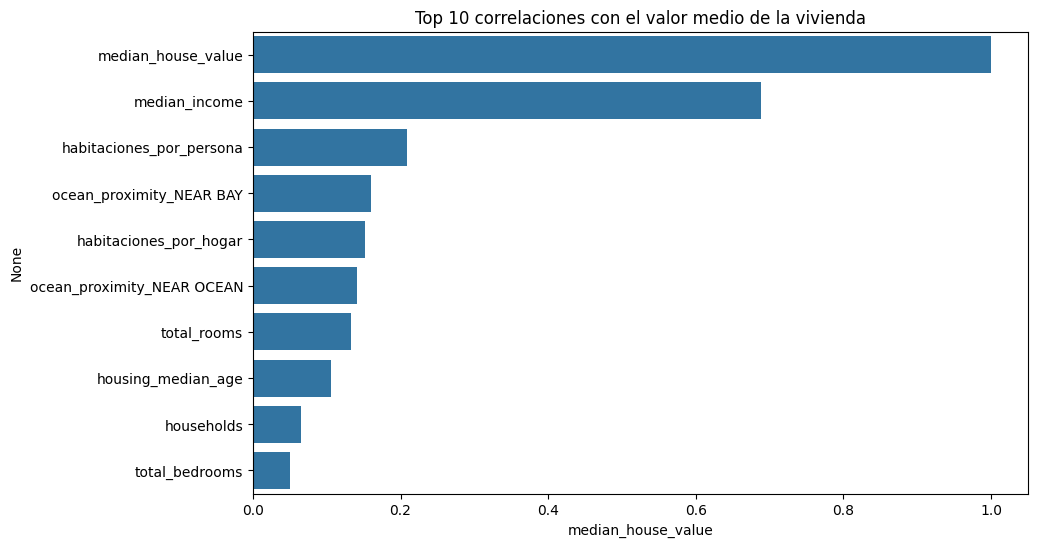

In [4]:
import seaborn as sns
# Copiamos el DataFrame para mantener el original intacto
datos = df.copy()

# Nuevas variables relacionadas entre columnas
datos["habitaciones_por_hogar"] = datos["total_rooms"] / datos["households"]
datos["habitaciones_por_persona"] = datos["total_rooms"] / datos["population"]
datos["habitantes_por_hogar"] = datos["population"] / datos["households"]

# Codificación one-hot para la variable categórica 'ocean_proximity'
datos = pd.get_dummies(datos, columns=["ocean_proximity"], drop_first=True)

# Verificación de resultados
print("Columnas después de la ingeniería de características:\n")
print(datos.columns.tolist())

# Revisión rápida de correlaciones con la variable objetivo
plt.figure(figsize=(10, 6))
correlaciones = datos.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)
sns.barplot(x=correlaciones.head(10), y=correlaciones.head(10).index)
plt.title("Top 10 correlaciones con el valor medio de la vivienda")
plt.show()


## División del conjunto de datos

numero total de filas: 20433
Conjunto de entrenamiento: 11442 filas
Conjunto de validación:   2861 filas
Conjunto de prueba:       6130 filas


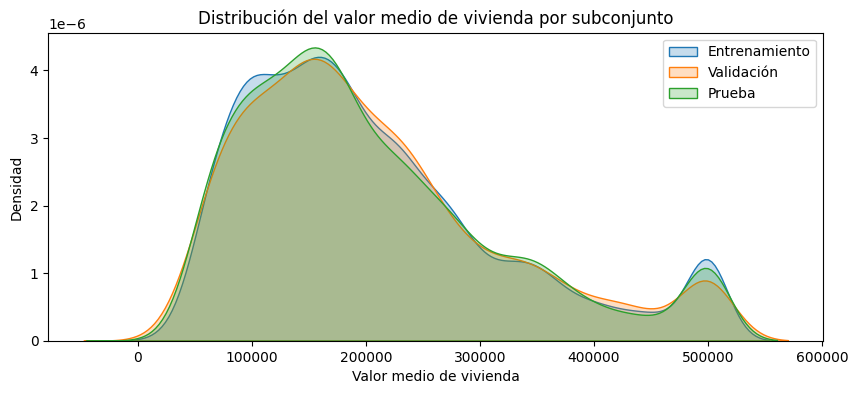

In [5]:

from sklearn.model_selection import train_test_split

# Separamos las variables predictoras (X) y la variable objetivo (y)
X = datos.drop("median_house_value", axis=1)
y = datos["median_house_value"]

# Dividimos en entrenamiento (70%) y prueba (30%)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Dividimos el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(
    X_entrenamiento, y_entrenamiento, test_size=0.2, random_state=42, shuffle=True
)

# Tamaños finales
print("numero total de filas:", X.shape[0])
print(f"Conjunto de entrenamiento: {X_entrenamiento.shape[0]} filas")
print(f"Conjunto de validación:   {X_validacion.shape[0]} filas")
print(f"Conjunto de prueba:       {X_prueba.shape[0]} filas")

# Verificamos que las distribuciones de valor medio de vivienda sean similares
plt.figure(figsize=(10, 4))
sns.kdeplot(y_entrenamiento, label="Entrenamiento", fill=True)
sns.kdeplot(y_validacion, label="Validación", fill=True)
sns.kdeplot(y_prueba, label="Prueba", fill=True)
plt.legend()
plt.xlabel("Valor medio de vivienda")
plt.ylabel("Densidad")
plt.title("Distribución del valor medio de vivienda por subconjunto")
plt.show()


## Entrenamiento, validación y resultados con Random Forest


Desempeño del modelo: Entrenamiento
  ➤ RMSE: 19,696.18
  ➤ R²: 0.971

Desempeño del modelo: Validación
  ➤ RMSE: 46,574.77
  ➤ R²: 0.835

Desempeño del modelo: Prueba
  ➤ RMSE: 50,088.11
  ➤ R²: 0.812


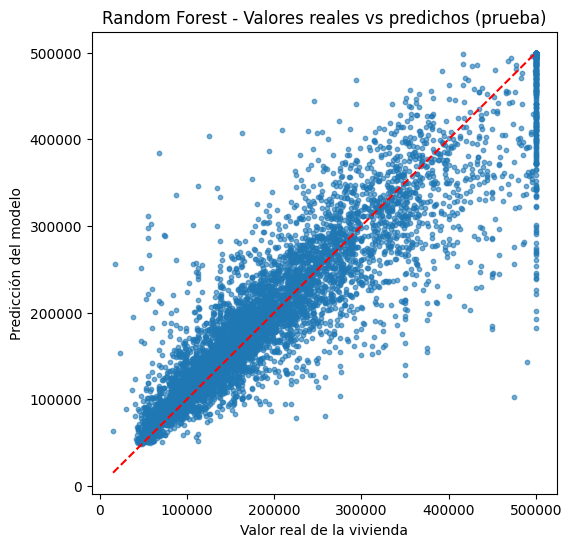

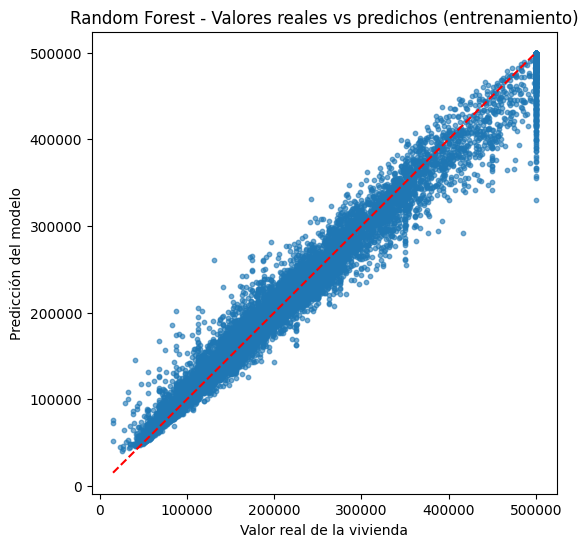

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Identificar variables numéricas
columnas_numericas = X_entrenamiento.select_dtypes(include=[np.number]).columns.tolist()

# Creamos pipeline del escalado y el modelo
modelo_rf = Pipeline([
    ('escalador', StandardScaler()),
    ('modelo', RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenamiento
modelo_rf.fit(X_entrenamiento, y_entrenamiento)

# Evaluación en entrenamiento, validación y prueba
def evaluar_modelo(nombre, modelo, X, y):
    predicciones = modelo.predict(X)
    rmse = mean_squared_error(y, predicciones) ** 0.5  # corregido
    r2 = r2_score(y, predicciones)
    print(f"\nDesempeño del modelo: {nombre}")
    print(f"  ➤ RMSE: {rmse:,.2f}")
    print(f"  ➤ R²: {r2:.3f}")
    return rmse, r2


rmse_train, r2_train = evaluar_modelo("Entrenamiento", modelo_rf, X_entrenamiento, y_entrenamiento)
rmse_val, r2_val = evaluar_modelo("Validación", modelo_rf, X_validacion, y_validacion)
rmse_test, r2_test = evaluar_modelo("Prueba", modelo_rf, X_prueba, y_prueba)

# Gráfica de valores reales vs predichos (conjunto de prueba)
plt.figure(figsize=(6,6))
plt.scatter(y_prueba, modelo_rf.predict(X_prueba), s=10, alpha=0.6)
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], 'r--')
plt.xlabel("Valor real de la vivienda")
plt.ylabel("Predicción del modelo")
plt.title("Random Forest - Valores reales vs predichos (prueba)")

plt.figure(figsize=(6,6))
plt.scatter(y_entrenamiento, modelo_rf.predict(X_entrenamiento), s=10, alpha=0.6)
plt.plot([y_entrenamiento.min(), y_entrenamiento.max()], [y_entrenamiento.min(), y_entrenamiento.max()], 'r--')
plt.xlabel("Valor real de la vivienda")
plt.ylabel("Predicción del modelo")
plt.title("Random Forest - Valores reales vs predichos (entrenamiento)")
plt.show()


## Análisis


Desempeño del modelo: Entrenamiento
  ➤ RMSE: 19,696.18
  ➤ R²: 0.971

Desempeño del modelo: Validación
  ➤ RMSE: 46,574.77
  ➤ R²: 0.835

Desempeño del modelo: Prueba
  ➤ RMSE: 50,088.11
  ➤ R²: 0.812


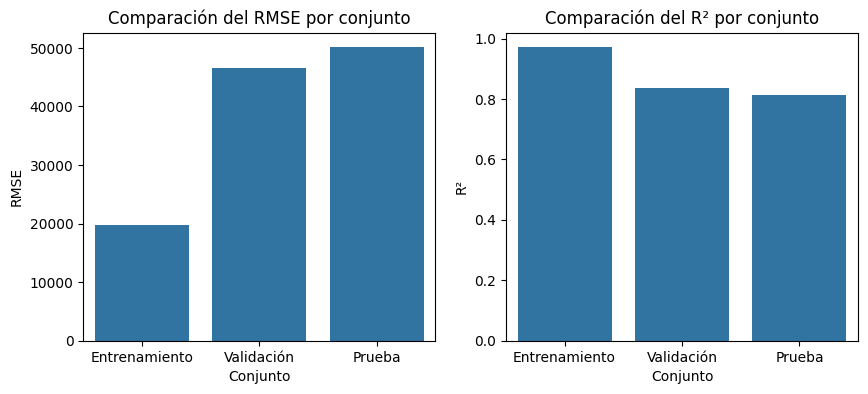

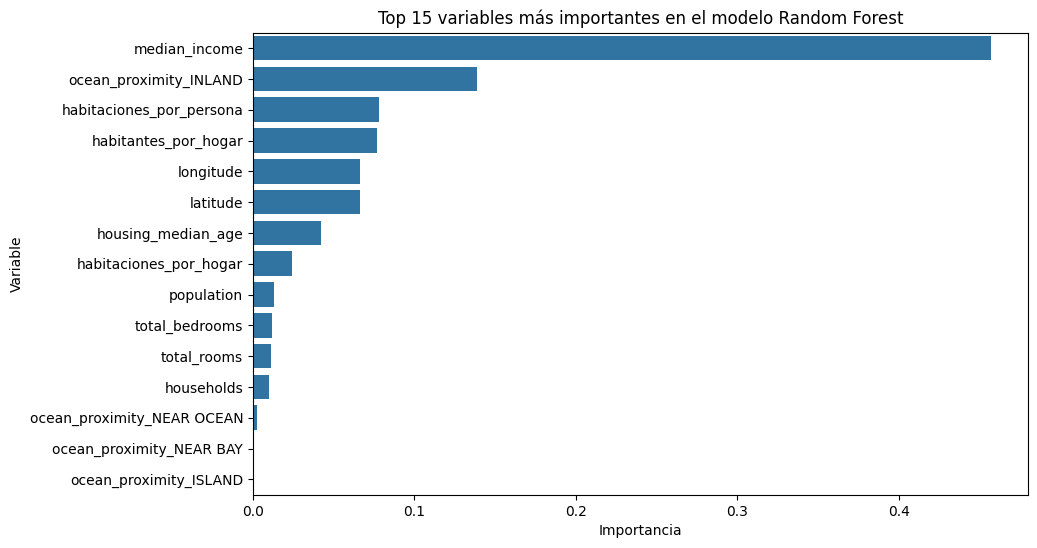

In [7]:
rmse_entrenamiento, r2_entrenamiento = evaluar_modelo("Entrenamiento", modelo_rf, X_entrenamiento, y_entrenamiento)
rmse_validacion, r2_validacion = evaluar_modelo("Validación", modelo_rf, X_validacion, y_validacion)
rmse_prueba, r2_prueba = evaluar_modelo("Prueba", modelo_rf, X_prueba, y_prueba)

# Comparación visual
resultados = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Validación", "Prueba"],
    "RMSE": [rmse_entrenamiento, rmse_validacion, rmse_prueba],
    "R²": [r2_entrenamiento, r2_validacion, r2_prueba]
})

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=resultados, x="Conjunto", y="RMSE", ax=ax[0])
ax[0].set_title("Comparación del RMSE por conjunto")
sns.barplot(data=resultados, x="Conjunto", y="R²", ax=ax[1])
ax[1].set_title("Comparación del R² por conjunto")
plt.show()

#Importancia de variables
importancias = modelo_rf.named_steps["modelo"].feature_importances_
caracteristicas = X_entrenamiento.columns
importancias_df = pd.DataFrame({"Variable": caracteristicas, "Importancia": importancias})
importancias_df = importancias_df.sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancias_df.head(15), x="Importancia", y="Variable")
plt.title("Top 15 variables más importantes en el modelo Random Forest")
plt.show()


## Guardar modelo y resultados

In [8]:
import joblib
import json

#Guardamos el modelo entrenado con joblib
ruta_modelo = "modelo_California_housing_prices.pkl"
joblib.dump(modelo_rf, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: modelo_California_housing_prices.pkl
